In [276]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [277]:
x_ds = [i for i in range(30)]
y_ds = [ i + np.random.normal(0,2) for i in x_ds ]
#w = np.random.rand(2)
#plt.plot(x_ds,y_ds, '.')

$h(x_i) = w_0 + w_1x_i$


In [278]:
#w = np.random.rand(2)
def h(x,w):
  return w[0] + w[1]*x

#y_pd = [h(i,w) for i in x_ds]
#plt.plot(x_ds,y_ds, '*')
#plt.plot(x_ds, y_pd)

In [279]:
"""print(math.cosh(math.pi))
print(math.log(148.41315910257657))
print(np.log(148.41315910257657))"""

'print(math.cosh(math.pi))\nprint(math.log(148.41315910257657))\nprint(np.log(148.41315910257657))'

MSE: Minimun Square Error

$Error =  \frac{1}{2n}\sum_{i=0}(y_i - h(x_i))²$

In [280]:
#MSE por comprensión
def Error(y,x,w):
 return sum( [ (e[0] - h(e[1],w))**2 for  e in zip(y,x) ])/(2*len(y))

#MAE por compresión
def Error2(y,x,w):
 return sum( [ abs(e[0] - h(e[1],w)) for e in zip(y,x) ])/(len(y))

#MSE pero con bucles
def Error1(y,x,w):
  suma =0
  for i in range(len(y)):
    suma = suma + (y[i] - h(x[i],w ))**2
  return suma/(2*len(y))
#MAE CON BUCLES
def Error_MAE(y,x,w):
  suma = 0
  for i in range (len(y)):
    suma = suma + abs(y[i]-h(x[i],w))
  return suma/(len(y))
#LOG COSH por comprensión
def Error_logcosh1(y,x,w):
  return sum( [np.log(math.cosh( e[0] - h(e[1],w ))) for e in zip(y,x)]) / (len(y))

#LOG COSH  con bucles
def Error_logcosh2(y, x, w): 
  suma = 0
  for i in range(len(y)):
    suma = suma + math.log(math.cosh(y[i] - h(x[i],w)))
  return suma/(len(y_ds))
#
def Error_huber(y,x,w):
  suma = 0
  for i in range (len(y)):
    var = 1*(y[i]) - h(x[i],w)
    if abs((y[i]) - h(x[i],w))<=var:
      suma = suma + (((y[i]) - h(x[i],w))**2)/2
    else:
      suma = suma + var*abs((y[i]) - h(x[i],w))-(var**2)/2
  return suma/(len(y))
w = np.random.rand(2)
y_pd  = [ h(i,w) for i in x_ds ]

#plt.plot(x_ds,y_ds, '*')
#plt.plot(x_ds,y_pd)

print(w)
print("Error MSE2: " + str(Error(y_ds, x_ds,w)))
print("Error MSE1: " + str(Error1(y_ds, x_ds,w)))
print("Error MAE2: " + str(Error2(y_ds, x_ds,w)))
print("Error MAE2: " + str(Error_MAE(y_ds, x_ds,w)))
print("Error Huber: " + str(Error_huber(y_ds, x_ds,w)))
print("Error Log-Cosh: " + str(Error_logcosh2(y_ds, x_ds,w)))

[0.1582092  0.07122568]
Error MSE2: 122.02333590468909
Error MSE1: 122.02333590468909
Error MAE2: 13.169894178920995
Error MAE2: 13.169894178920995
Error Huber: 122.02333590468909
Error Log-Cosh: 12.515559361528867


Calcular las derivadas (Gradiente)

$Error =  \frac{1}{2n}\sum_{i=0}(y_i - h(x_i))²$



$\frac{ \partial Error}{\partial w_0}  = \frac{1}{n}\sum_{i=0}(y_i - h(x_i))*(-1) $

$\frac{ \partial Error}{\partial w_1}  = \frac{1}{n}\sum_{i=0}(y_i - h(x_i))*(-x) $


Error Log-Cosh Loss

$h(x_i) = w_0 + w_1*x$ 

$Error =  \sum_{i=0}\log{(\cosh{(y_i - h(x_i))}}$

$Error =  \sum_{i=0}\log{(\cosh{(y_i - w_0 - w_1*x))}}$

$\frac{ \partial Error}{\partial w_0}  =  -\tanh{(y_i - h(x_i))}$

$\frac{ \partial Error}{\partial w_1}  =\tanh{(y_i - h(x_i))} $

In [281]:
# NO MODIFIQUEN MI COPIA POR FAVOR, HAGAN SU PROPIA COPIA
b_w = np.random.rand(2)
def grad_mse(y,x,w):

  grad_w0 = 2*sum([ (e[0] - h(e[1],w))*(-1)    for e in zip(y,x) ])/len(y)
  grad_w1 = 2*sum([ (e[0] - h(e[1],w))*(-e[1]) for e in zip(y,x) ])/len(y)
  return grad_w0, grad_w1

def grad_mae(y,x,w):

  grad_w0 = sum([ (e[0] - h(e[1],w)/abs(e[0] - h(e[1],w))*(-1)) for e in zip(y,x) ])/len(y)
  grad_w1 = sum([ (e[0] - h(e[1],w)/abs(e[0] - h(e[1],w))*(-e[1])) for e in zip(y,x)])/len(y)
  return grad_w0,grad_w1

def grad_huber(y,x,w):
  var = 1*(y[0]) - h(x[1],w)
  if abs((y[0]) - h(x[1],w))<=var:
    grad_w0 = 2*sum([ (e[0] - h(e[1],w))*(-1)    for e in zip(y,x) ])/len(y)
    grad_w1 = 2*sum([ (e[0] - h(e[1],w))*(-e[1]) for e in zip(y,x) ])/len(y)
    return grad_w0, grad_w1
  else:
    grad_w0 = sum([ (-1)*(e[0] - h(e[1],w)/abs(e[0] - h(e[1],w))*(-1)) for e in zip(y,x) ])/len(y)
    grad_w1 = sum([ (-e[1])*(e[0] - h(e[1],w)/abs(e[0] - h(e[1],w))*(-e[1])) for e in zip(y,x)])/len(y) 
    return grad_w0, grad_w1

def grad_logcosh(y, x, w):
  grad_w0 = sum([ (math.tanh(e[0] - h(e[1],w)))*(-1) for e in zip(y,x)])
  grad_w1 = sum([ (math.tanh(e[0] - h(e[1],w))) for e in zip(y,x)])

  return grad_w0, grad_w1           
 

print(grad_mse(y_ds, x_ds, w))
print(grad_mae(y_ds, x_ds, w))
print(grad_huber(y_ds, x_ds, w))
print(grad_logcosh(y_ds, x_ds, w))

(-26.33978835784199, -523.1760153516781)
(14.614150895468319, 15.84969700210062)
(-26.33978835784199, -523.1760153516781)
(-28.13077566591141, 28.13077566591141)


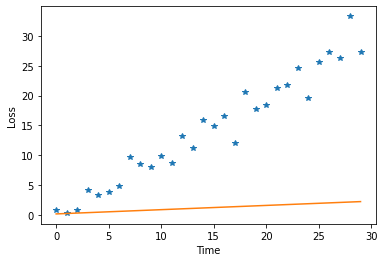

In [282]:
def train(x_ds, y_ds, w, epochs, alpha):
  w = np.random.rand(2)
  list_error = []
  time = []
  for i in range(epochs):
    Err = Error2(y_ds,x_ds,w)  
    list_error.append(Err)
    time.append(i)
    grad_w0, grad_w1 = grad_huber(y_ds,x_ds,w)
    w[0] = w[0] - alpha*grad_w0
    w[1] = w[1] - alpha*grad_w1
  plt.xlabel("Time")
  plt.ylabel("Loss")
  #plt.plot(time,list_error, '*')
  return time,list_error

train(x_ds,y_ds, w, 50,0.007)
plt.plot(x_ds, y_ds,'*')
plt.plot(x_ds, [ h(i,w) for i in x_ds])

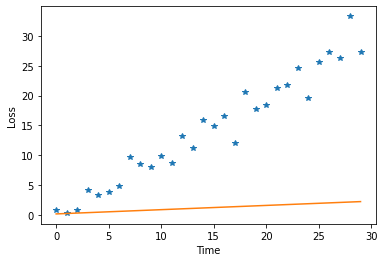

In [283]:
def train(x_ds, y_ds, w, epochs, alpha):
  w = np.random.rand(2)
  list_error = []
  time = []
  for i in range(epochs):
    Err = Error_logcosh1(y_ds,x_ds,w) 
    list_error.append(Err)
    time.append(i)
    grad_w0, grad_w1 = grad_logcosh(y_ds,x_ds,w)
    w[0] = w[0] - alpha*grad_w0
    w[1] = w[1] - alpha*grad_w1
  plt.xlabel("Time")
  plt.ylabel("Loss")
  #plt.plot(time,list_error, '*')
  return time,list_error

train(x_ds,y_ds, w, 50,0.007)
plt.plot(x_ds, y_ds,'*')
plt.plot(x_ds, [ h(i,w) for i in x_ds])